# Hand Gesture Recognition using a Convolutional Neural Network model
---





# Introduction

Gesture Recognition deals with the interpretation of human gestures via mathematical algorithms. Gestures can originate from any bodily motion or state but commonly originate from the face or hand. In this notebook, we'll build a model to recognize various hand gestures. Currently, the best algorithms for Recognition tasks in Computer Vision are based on a deep learning technique, namely convolutional neural networks. Although, deep neural networks need massive datasets to train on to actually make sense of the data - It automates the entire feature selection process thus saving a lot of time & effort. (For a more traditional approach to this problem, we could first prepare a binary mask of the hand, compute the contour of the mask and it’s convex hull, detect the fingertips and so on. All in all, it's a very time-consuming process because we have to manually work with various elements of the image.)


![Can't display image](https://miro.medium.com/max/480/1*szQD8urr_5PuCjf5PjN1_w.jpeg)

Convex Hull of hand contour (We won't be using such techniques)

[(Source)](https://medium.com/@muehler.v/simple-hand-gesture-recognition-using-opencv-and-javascript-eb3d6ced28a0)

# Importing the necessary libraries
At first, we need to import some necessary Python libraries that'll help us to manipulate the images in our dataset & organize 'em into arrays prior to feeding them into our Neural Network. We also need to import libraries to build, train & evaluate the performance of the model. 


In [82]:
#For data manipulation, analysis & visualization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.utils import to_categorical
import random
import cv2
import pandas as pd

#For building neural nets
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#For model validation, evaluation & visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.utils import plot_model

#For handling files
from google.colab import files
import os

#Miscellaneous
import warnings
warnings.filterwarnings('ignore')

In [2]:
#For importing kaggle dataset
! pip install -q kaggle

In [3]:
#Versions of all the libraries to re-implement this model, if needed
! pip freeze

absl-py==0.8.1
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
argon2-cffi==20.1.0
asgiref==3.2.10
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.1.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.1.5
blis==0.4.1
bokeh==2.1.1
boto==2.49.0
boto3==1.14.48
botocore==1.17.48
Bottleneck==1.3.2
branca==0.4.1
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.1.1
catalogue==1.0.0
certifi==2020.6.20
cffi==1.14.2
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.4.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.1
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.3
Cython==0.29.21
daft==0.0.4
dask==2.12.0
dataclasses==0.7
datascience==0.10.6
debugpy==1.0.0rc2
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.2
distributed==1.25.3
Django==3.1
dlib==19.18.0
dm-

# Importing the dataset
We'll use the [Hand Gesture Recognition Database by Leap Motion](https://www.kaggle.com/gti-upm/leapgestrecog) from Kaggle for training our CNN model.

Connecting kaggle API to Colab

In [5]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anubhabdaserrr","key":"40838e25fed5aa2ffb55d0495c938b53"}'}

In [6]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
#gives full read & write access to the file
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
#to test if kaggle API is connected to colab
! kaggle datasets list

ref                                                               title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
jmmvutu/summer-products-and-sales-in-ecommerce-wish               Sales of summer clothes in E-commerce Wish        376KB  2020-08-23 15:16:46           3297  
Cornell-University/arxiv                                          arXiv Dataset                                     880MB  2020-08-27 23:07:17           2111  
agirlcoding/all-space-missions-from-1957                          All Space Missions from 1957                      101KB  2020-08-13 16:18:58           1711  
gpreda/unemployment-in-european-union                             Unemployment in European Union                    876KB  2020-08-30 09:12:18            581  
landlord/handwriting-recognition        

Downloading the dataset from Kaggle

In [10]:
! kaggle datasets download -d gti-upm/leapgestrecog

100% 2.12G/2.13G [00:20<00:00, 102MB/s]
100% 2.13G/2.13G [00:20<00:00, 109MB/s]


# Data Preprocessing & Exploratory Data Analysis
In this section, we'll explore the imported dataset, check the class distribution & prepare it for feeding into the Convnet.

In [11]:
!unzip /content/leapgestrecog.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0013.png  
  inflating: leapgestrecog/leapGestRe

In [12]:
#Storing all the classes of data in the dictionary lookup.
lookup=dict()
reverselookup = dict()
count = 0
for j in os.listdir('/content/leapgestrecog/leapGestRecog/00/'):
    if not j.startswith('.'): # If running this code locally, this is to 
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup        

{'01_palm': 5,
 '02_l': 6,
 '03_fist': 0,
 '04_fist_moved': 3,
 '05_thumb': 1,
 '06_index': 4,
 '07_ok': 8,
 '08_palm_moved': 7,
 '09_c': 9,
 '10_down': 2}

In [13]:
x_data = []
y_data = []
IMG_SIZE = 150
datacount = 0 # We'll use this to tally how many images are in our dataset
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('/content/leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('/content/leapgestrecog/leapGestRecog/0' + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                path = '/content/leapgestrecog/leapGestRecog/0' + str(i) + '/' + j + '/' + k
                img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

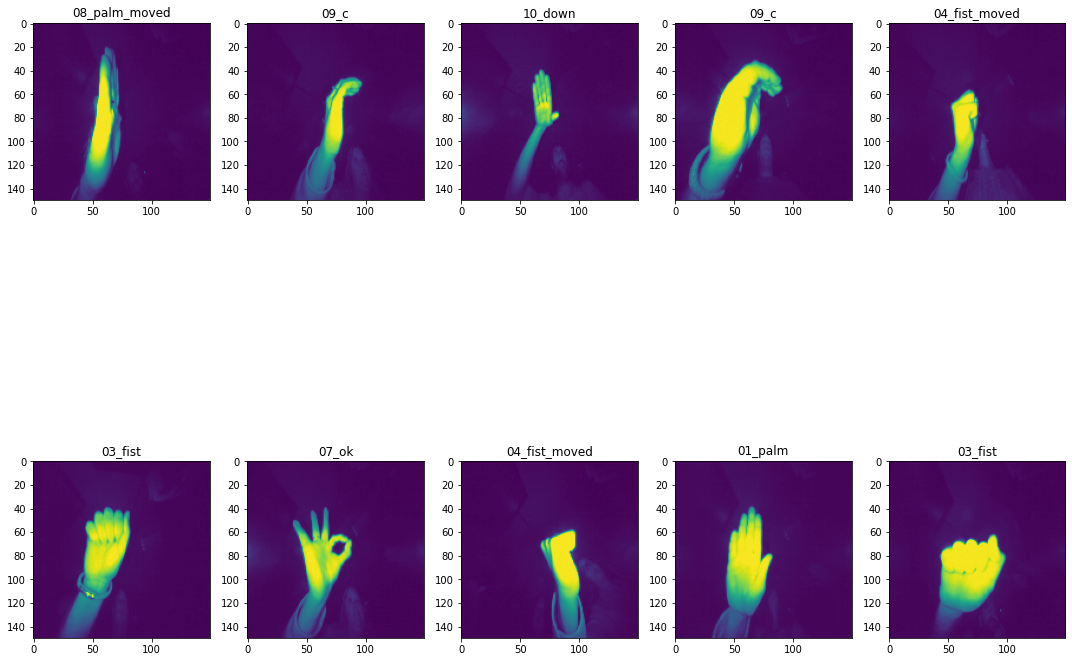

In [14]:
# check some images
fig,ax=plt.subplots(2,5)
fig.set_size_inches(15,15)
for i in range(2):
    for j in range (5):
        l=random.randint(0,len(y_data))
        ax[i,j].imshow(x_data[l])
        ax[i,j].set_title(reverselookup[y_data[l,0]])
        
plt.tight_layout()

In [15]:
#Checking the class distribution
unique, counts = np.unique(y_data,return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 2000]
 [   1 2000]
 [   2 2000]
 [   3 2000]
 [   4 2000]
 [   5 2000]
 [   6 2000]
 [   7 2000]
 [   8 2000]
 [   9 2000]]


The data is uniformly distributed amongst all the classes.

In [16]:
y_data=to_categorical(y_data) #For one-hot encoding
x_data = x_data.reshape((datacount, IMG_SIZE, IMG_SIZE, 1))
x_data = x_data/255 #normalizing data

In [17]:
x_data.shape

(20000, 150, 150, 1)

In [18]:
y_data.shape

(20000, 10)

So, we have 20000 samples.

In [19]:
#Saving the prepared data prior to feeding it to the network for latter usage
np.save('x_data.npy',x_data)
np.save('y_data.npy',y_data)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.2)

In [21]:
x_train.shape

(16000, 150, 150, 1)

In [22]:
y_train.shape

(16000, 10)

In [23]:
x_test.shape

(4000, 150, 150, 1)

In [24]:
y_test.shape

(4000, 10)

Let's check if our test set has an (almost) uniform distribution amongst all classes. 

In [80]:
y_test_classes=y_test.argmax(axis=-1)+1
y_test_classes

array([ 8, 10,  1, ...,  5,  9,  8])

In [81]:
np.unique(y_test_classes, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([406, 387, 395, 391, 390, 387, 410, 422, 421, 391]))

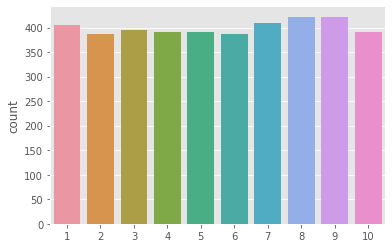

In [83]:
sns.countplot(y_test_classes)

It does !

So, we have 16000 training examples & 4000 test examples.

# Building the model
In this section, we build the CNN model to classify various hand gestures. We start off with an input layer to feed the images & then we add three stacks of layers where each stack contains a Convolutional Layer which extracts features using multiple filters by applying each of them in a small area in the image at a time & eventually scans the whole image. This layer is followed by a Max Pooling layer (in each of the stacks), the purpose of which is basically to reduce the dimensionality of an image. Then, we add another layer to flatten the output from the previous layer prior to feeding it to the 2 Fully Connected/Dense Layers which basically helps to learn features to classify the images. The final layer is a Softmax layer that gives a probability distribution over predicted output classes.

Note : As we go deeper in the network, we increase the no. of filters in the convolutional layers because filters are like pattern detectors i.e. in the initial layers, they detect low-level patterns like edges and in the latter layers, we combine these patterns to detect even more complex patterns for which we need more filters.  [(Source)](https://datascience.stackexchange.com/questions/55545/in-cnn-why-do-we-increase-the-number-of-filters-in-deeper-convolution-layers-fo)

![Can't display image](https://miro.medium.com/max/753/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

Generic CNN Architecture

[(Source)](https://in.mathworks.com/solutions/deep-learning/convolutional-neural-network.html)

In [25]:
model1 = Sequential()

#Layer 1 : Input Layer + Convolutional + MaxPooling Layer
model1.add(Conv2D(filters=16, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
model1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#Layer 2 : Convolutional + MaxPooling Layer
model1.add(Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#Layer 3 : Convolutional + MaxPooling Layer
model1.add(Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#Non-trainable Flatenning layer
model1.add(Flatten())

#Layer 4 : Fully Connected Layer
model1.add(Dense(128,activation='relu'))

#Layer 5 : Fully Connected Layer
model1.add(Dense(64,activation='relu'))

#Layer 4 : Softmax Output Layer
model1.add(Dense(10,activation='softmax'))


The loss function is set to Categorical Cross-Entropy / Softmax Loss which is basically a Softmax activation plus a Cross-Entropy loss. It is used for multi-class classification & it trains the network to output a probability distribution over the the output classes for each image. We also set the evaluation metric to Accuracy which is  the number of accurately predicted outputs divided by the total number of outputs.

In [26]:
model1.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Model Visualization

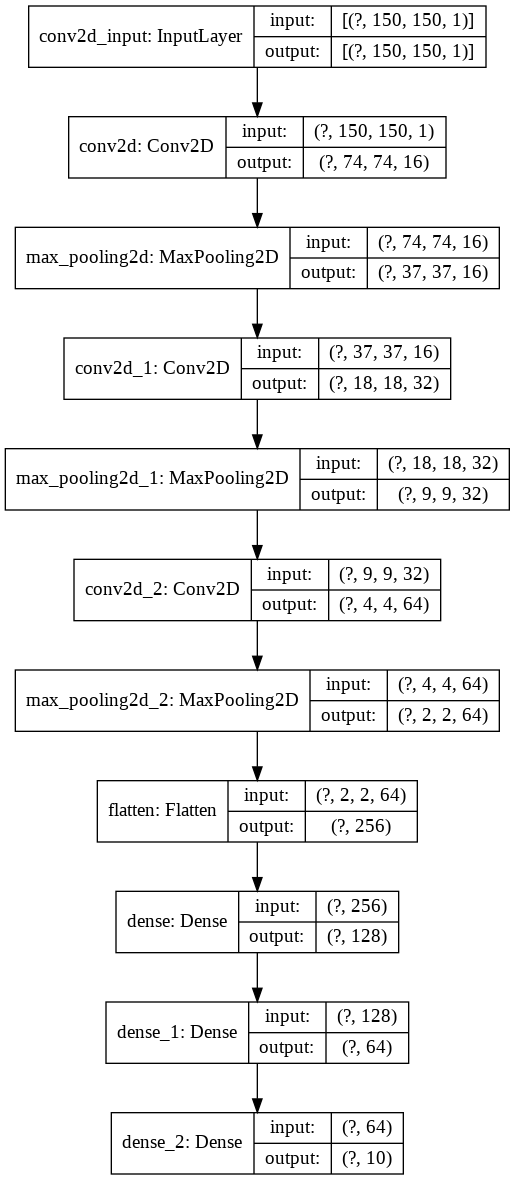

In [27]:
plot_model(model1, to_file='model1_convnet.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [28]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 74, 74, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

# Training the model
We use the Adam optimizer to train the model with a mini batch size of 64 and we run the optimizer for the duration of 10 epochs.

In [29]:
batch_size=64
epochs = 10

In [30]:
History = model1.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
250/250 [==============================] - 38s 152ms/step - loss: 0.6630 - accuracy: 0.7837 - val_loss: 0.0598 - val_accuracy: 0.9862
Epoch 2/10
250/250 [==============================] - 38s 150ms/step - loss: 0.0463 - accuracy: 0.9866 - val_loss: 0.0406 - val_accuracy: 0.9868
Epoch 3/10
250/250 [==============================] - 37s 150ms/step - loss: 0.0213 - accuracy: 0.9939 - val_loss: 0.0155 - val_accuracy: 0.9962
Epoch 4/10
250/250 [==============================] - 37s 149ms/step - loss: 0.0121 - accuracy: 0.9971 - val_loss: 0.0079 - val_accuracy: 0.9983
Epoch 5/10
250/250 [==============================] - 37s 149ms/step - loss: 0.0067 - accuracy: 0.9986 - val_loss: 0.0029 - val_accuracy: 0.9990
Epoch 6/10
250/250 [==============================] - 37s 149ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7/10
250/250 [==============================] - 37s 149ms/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.0123 - val_ac

We've obtained 99% validation accuracy.

In [31]:
model1.save('model1_convnet')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model1_convnet/assets


In [32]:
!zip -r /content/model1_convnet.zip /content/model1_convnet

  adding: content/model1_convnet/ (stored 0%)
  adding: content/model1_convnet/saved_model.pb (deflated 89%)
  adding: content/model1_convnet/variables/ (stored 0%)
  adding: content/model1_convnet/variables/variables.data-00000-of-00001 (deflated 10%)
  adding: content/model1_convnet/variables/variables.index (deflated 67%)
  adding: content/model1_convnet/assets/ (stored 0%)


In [33]:
files.download('/content/model1_convnet.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model Evaluation

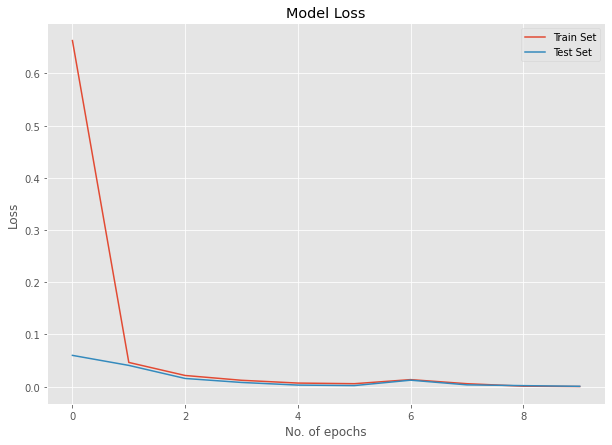

In [44]:
plt.figure(figsize=(10,7))
plt.style.use('ggplot')
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.legend(['Train Set', 'Test Set'])
plt.show()

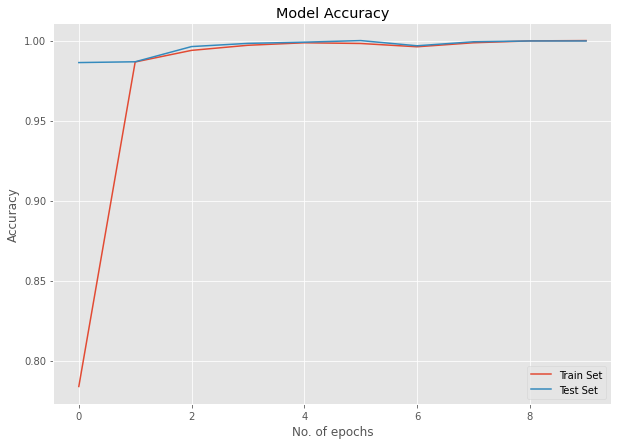

In [45]:
plt.figure(figsize=(10,7))
plt.style.use('ggplot')
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of epochs')
plt.legend(['Train Set', 'Test Set'])
plt.show()

In [52]:
y_pred_vec=model1.predict(x_test)
y_pred_vec

array([[2.8426864e-15, 1.9962512e-17, 8.7122904e-12, ..., 9.9999917e-01,
        1.5552592e-07, 1.4615854e-07],
       [2.0402591e-09, 2.3773909e-14, 9.7685904e-09, ..., 5.2687954e-20,
        2.3449623e-13, 1.0000000e+00],
       [9.9999809e-01, 6.8252945e-07, 1.9188526e-08, ..., 1.5201144e-18,
        1.7440571e-10, 4.7228244e-10],
       ...,
       [6.6373508e-12, 1.5304453e-17, 6.7453909e-14, ..., 4.4056828e-10,
        5.7432366e-09, 1.9446986e-16],
       [3.8467236e-18, 2.2053260e-17, 3.7569604e-15, ..., 7.7542737e-08,
        9.9999416e-01, 1.8335242e-10],
       [1.4977034e-26, 1.8080014e-27, 1.0650372e-18, ..., 1.0000000e+00,
        7.8865373e-11, 4.0847946e-17]], dtype=float32)

In [54]:
y_pred=y_pred_vec.argmax(axis=-1)+1
y_pred

array([ 8, 10,  1, ...,  5,  9,  8])

In [57]:
y_test_classes=y_test.argmax(axis=-1)+1
y_test_classes

array([ 8, 10,  1, ...,  5,  9,  8])

In [86]:
df=pd.DataFrame(confusion_matrix(y_test_classes,y_pred))
df.rename(columns={0:1,1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:9,9:10}, index={0:1,1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:9,9:10},inplace=True)
df
#The row indices are the actual labels & the column names are the predicted labels.

,1,2,3,4,5,6,7,8,9,10
1,406,0,0,0,0,0,0,0,0,0
2,0,387,0,0,0,0,0,0,0,0
3,0,0,395,0,0,0,0,0,0,0
4,0,0,0,391,0,0,0,0,0,0
5,0,0,0,0,390,0,0,0,0,0
6,0,0,0,0,0,387,0,0,0,0
7,0,0,0,0,0,1,409,0,0,0
8,0,0,0,0,0,0,0,422,0,0
9,0,0,0,0,0,0,0,0,421,0
10,0,0,0,0,0,0,0,0,0,391


In [59]:
print(classification_report(y_test_classes,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       406
           2       1.00      1.00      1.00       387
           3       1.00      1.00      1.00       395
           4       1.00      1.00      1.00       391
           5       1.00      1.00      1.00       390
           6       1.00      1.00      1.00       387
           7       1.00      1.00      1.00       410
           8       1.00      1.00      1.00       422
           9       1.00      1.00      1.00       421
          10       1.00      1.00      1.00       391

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [79]:
[loss, acc] = model1.evaluate(x_train,y_train,verbose=1)
print("Training Set Accuracy : " + str(acc))

500/500 [==============================] - 15s 29ms/step - loss: 8.2580e-05 - accuracy: 1.0000
Training Set Accuracy : 1.0


In [77]:
[loss, acc] = model1.evaluate(x_test,y_test,verbose=1)
print("Test Set Accuracy : " + str(acc))

125/125 [==============================] - 4s 29ms/step - loss: 5.3446e-04 - accuracy: 0.9998
Test Set Accuracy : 0.999750018119812


# Results

For the trained ConvNet model, we've obtained an in-sample accuracy score of 100% and an out-of-sample accuracy score of 99.98% .

# References

Following are the resources that helped me with this mini-project :



*   https://www.kaggle.com/gti-upm/leapgestrecog (Dataset used can be found here.)
*   https://www.kaggle.com/benenharrington/hand-gesture-recognition-database-with-cnn
*   https://www.kaggle.com/kageyama/keras-hand-gesture-recognition-cnn
*   https://medium.com/@muehler.v/simple-hand-gesture-recognition-using-opencv-and-javascript-eb3d6ced28a0
*   https://datascience.stackexchange.com/questions/55545/in-cnn-why-do-we-increase-the-number-of-filters-in-deeper-convolution-layers-fo
*   https://in.mathworks.com/solutions/deep-learning/convolutional-neural-network.html
